# XGBoost


## Omajinai

In [1]:
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab"

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import xgboost

/home/eunchong/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

/home/eunchong/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning:

0.23ubuntu1 is an invalid version and will not be supported in a future release

/home/eunchong/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning:

0.1.36ubuntu1 is an invalid version and will not be supported in a future release



In [3]:
print('pandas', pd.__version__)
print('xgboost', xgboost.__version__)

pandas 1.4.1
xgboost 1.5.2


## Data

In [4]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2022-03-29 22:36:21--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 65.9.42.42, 65.9.42.72, 65.9.42.119, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|65.9.42.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112852 (110K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>] 110.21K  --.-KB/s    in 0.1s    

2022-03-29 22:36:22 (1.11 MB/s) - ‘newly_confirmed_cases_daily.csv’ saved [112852/112852]



In [5]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
display(df.head(1))
display(df.tail(5))

(803, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-24,49821,2048,574,242,699,238,170,444,933,681,...,265,165,2321,244,294,434,292,193,539,981
2022-03-25,47399,2138,675,263,441,256,175,480,1359,571,...,320,149,2172,220,211,414,279,254,491,825
2022-03-26,47233,1701,526,247,564,288,195,420,1339,628,...,257,133,2277,316,256,379,283,218,597,879
2022-03-27,43237,1497,461,265,474,231,168,389,1294,480,...,213,123,1941,186,208,312,246,204,468,838
2022-03-28,29740,1200,336,154,302,152,156,310,1239,323,...,142,80,1504,297,98,284,240,184,330,362


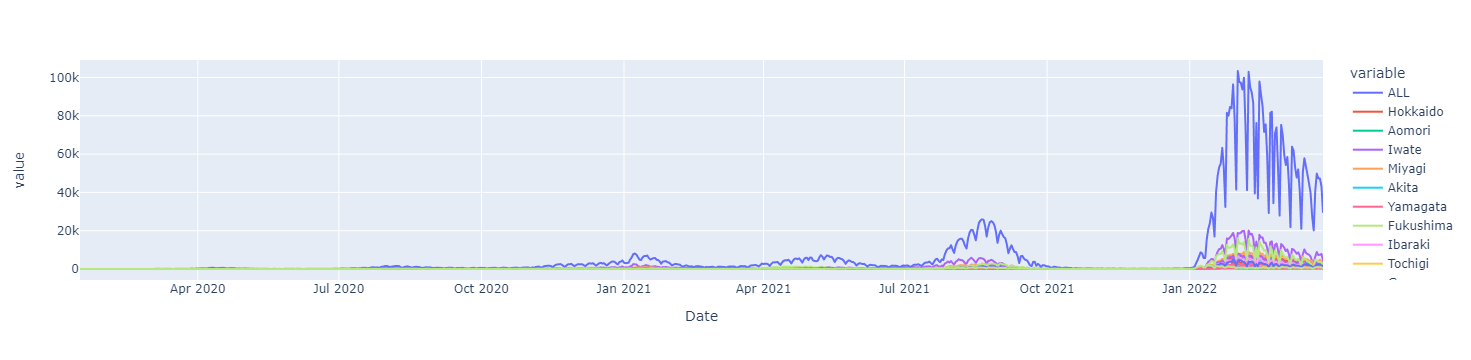

In [6]:
px.line(df, )

In [7]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).mean()
df_gr = df_gr.drop(df_gr.index[-1])
print(df_gr.shape)
display(df_gr.head(1))
display(df_gr.tail(5))

(115, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-27,60612.285714,2102.428571,353.571429,304.857143,618.428571,202.857143,123.000000,270.857143,1223.428571,560.142857,...,202.142857,149.857143,2155.000000,320.571429,268.857143,581.428571,285.285714,210.857143,432.571429,623.714286
2022-03-06,55710.285714,1694.000000,429.285714,257.857143,648.142857,205.000000,121.571429,303.857143,1399.571429,488.428571,...,269.142857,177.285714,1847.857143,326.000000,237.142857,587.571429,323.000000,212.571429,412.571429,801.857143
2022-03-13,48720.285714,1525.714286,434.571429,231.714286,583.000000,191.000000,166.714286,375.285714,1409.285714,442.000000,...,266.000000,172.571429,1693.857143,290.285714,231.857143,631.428571,279.857143,219.857143,333.857143,649.000000
2022-03-20,45198.714286,1524.000000,504.714286,246.285714,524.857143,203.714286,182.714286,357.857143,1295.571429,512.000000,...,243.714286,152.285714,1917.285714,234.714286,225.285714,470.000000,211.000000,224.285714,328.857143,638.000000
2022-03-27,39484.285714,1500.285714,472.142857,211.571429,462.285714,220.285714,139.000000,365.285714,1104.571429,514.285714,...,224.142857,130.857143,1766.857143,223.428571,213.285714,357.285714,242.428571,194.000000,432.142857,723.142857


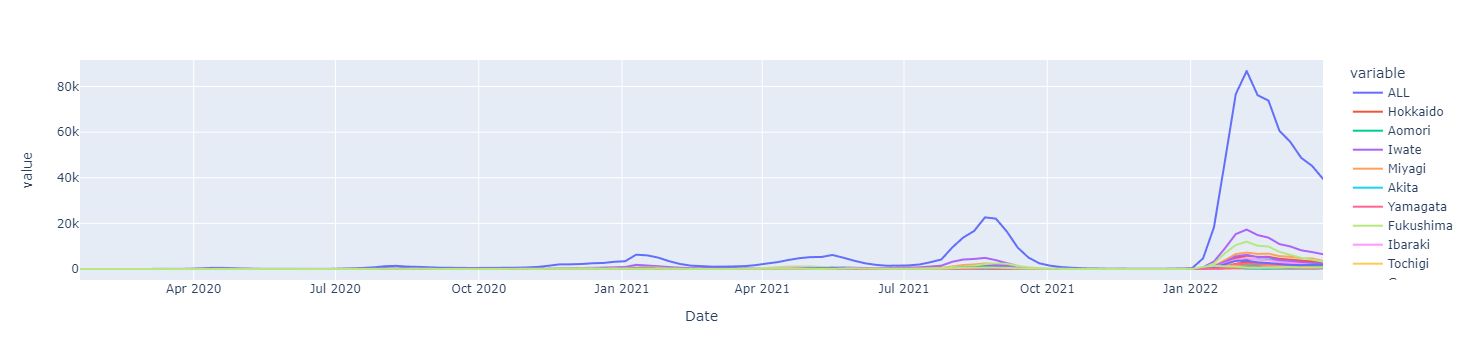

In [8]:
px.line(df_gr,)

### Scale

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
ts_all = df_gr.ALL
ts_all_sc = sc.fit_transform(ts_all.values.reshape(-1, 1)).ravel()
ts_all_sc = pd.Series(ts_all_sc, index=ts_all.index)
ts_all_sc.head(1)

Date
2020-01-19    0.0
Freq: W-SUN, dtype: float64

### FE

In [10]:
forecast_weeks = 12
# df_fe = df_gr.ALL.to_frame()
df_fe = ts_all_sc.to_frame(name='ALL')

# add new rows for forecast
index_list = pd.date_range(ts_all_sc.index[-1]+relativedelta(weeks=1), ts_all_sc.index[-1]+relativedelta(weeks=forecast_weeks), freq='W')
df_fe = pd.concat([df_fe, pd.DataFrame(index=index_list)])

# shift
for i in range(forecast_weeks, forecast_weeks+12):
    df_fe[f'ALL_{i}_week_ago'] = df_fe.ALL.shift(i)
# df_fe[f'ALL_12_week_ago'] = df_fe.ALL.shift(12)
df_fe['year'] = df_fe.index.year
df_fe['month'] = df_fe.index.month
df_fe['weekofyear'] = df_fe.index.isocalendar().week
df_fe = df_fe.astype('float')
df_fe = df_fe.loc[df_fe.ALL_23_week_ago.dropna().index, :]
df_fe

,ALL,ALL_12_week_ago,ALL_13_week_ago,ALL_14_week_ago,ALL_15_week_ago,ALL_16_week_ago,ALL_17_week_ago,ALL_18_week_ago,ALL_19_week_ago,ALL_20_week_ago,ALL_21_week_ago,ALL_22_week_ago,ALL_23_week_ago,year,month,weekofyear
2020-06-28,0.000917,0.003139,0.001286,0.000443,0.000522,0.000386,0.000181,0.000124,0.000022,0.000002,0.000010,0.000002,0.000000,2020.0,6.0,26.0
2020-07-05,0.002093,0.005724,0.003139,0.001286,0.000443,0.000522,0.000386,0.000181,0.000124,0.000022,0.000002,0.000010,0.000002,2020.0,7.0,27.0
2020-07-12,0.003477,0.005707,0.005724,0.003139,0.001286,0.000443,0.000522,0.000386,0.000181,0.000124,0.000022,0.000002,0.000010,2020.0,7.0,28.0
2020-07-19,0.005548,0.004374,0.005707,0.005724,0.003139,0.001286,0.000443,0.000522,0.000386,0.000181,0.000124,0.000022,0.000002,2020.0,7.0,29.0
2020-07-26,0.008519,0.002705,0.004374,0.005707,0.005724,0.003139,0.001286,0.000443,0.000522,0.000386,0.000181,0.000124,0.000022,2020.0,7.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-22,NaN,0.698381,0.850498,0.878260,1.000000,0.883256,0.543028,0.210780,0.053592,0.004451,0.002580,0.001709,0.001321,2022.0,5.0,20.0
2022-05-29,NaN,0.641900,0.698381,0.850498,0.878260,1.000000,0.883256,0.543028,0.210780,0.053592,0.004451,0.002580,0.001709,2022.0,5.0,21.0
2022-06-05,NaN,0.561360,0.641900,0.698381,0.850498,0.878260,1.000000,0.883256,0.543028,0.210780,0.053592,0.004451,0.002580,2022.0,6.0,22.0
2022-06-12,NaN,0.520784,0.561360,0.641900,0.698381,0.850498,0.878260,1.000000,0.883256,0.543028,0.210780,0.053592,0.004451,2022.0,6.0,23.0


### split

In [11]:
X = df_fe.drop('ALL', axis=1)
y = df_fe.ALL
print(X.shape, y.shape)

(104, 15) (104,)


## functions

In [12]:
def trainXGBoost(X_train, y_train):    
    # val
    X_val = X_train[X_train.index == X_train.index[-1]]
    X_train = X_train.drop(X_train.index[-1])
    y_val = y_train[y_train.index == y_train.index[-1]]
    y_train = y_train.drop(y_train.index[-1])
    
    params = {'n_estimators': 1000, 'random_state': 42, 'objective': 'reg:squarederror', 'booster': 'gblinear'}
    
    model = xgboost.XGBRegressor(**params)
    model.fit(
        X_train, y_train, verbose=0,
        eval_set=[(X_val, y_val)], eval_metric='rmse', early_stopping_rounds=10,
    )

    return model

## forecast

(80, 15) (80,)


/home/eunchong/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



CPU times: user 876 ms, sys: 20.4 ms, total: 896 ms
Wall time: 398 ms


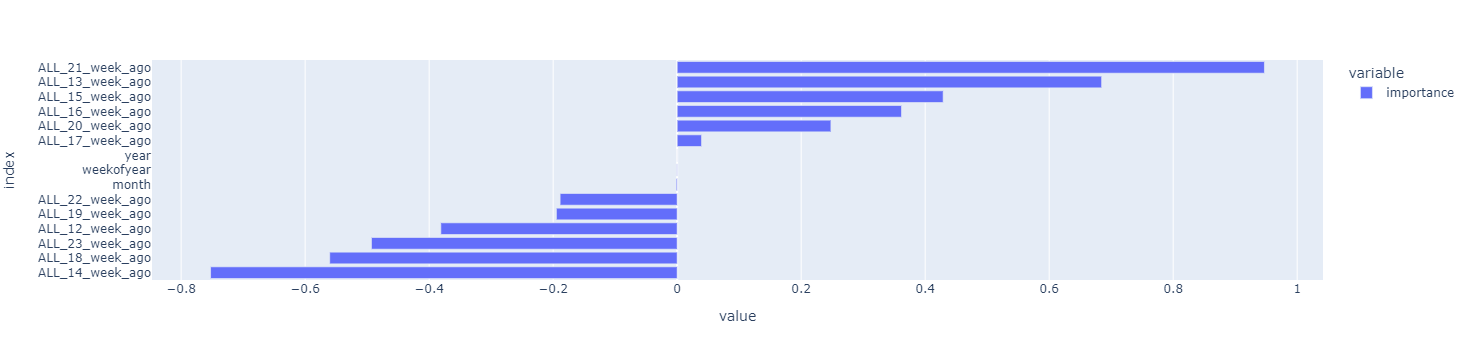

In [13]:
%%time

train_last_date = '2022-01-02'
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
print(X_train.shape, y_train.shape)

model = trainXGBoost(X_train, y_train)

fi = pd.DataFrame(model.coef_, index=X_train.columns, columns=['importance']).sort_values('importance')
px.bar(fi, orientation='h')

RMSE: 4486.4


/home/eunchong/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

/home/eunchong/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



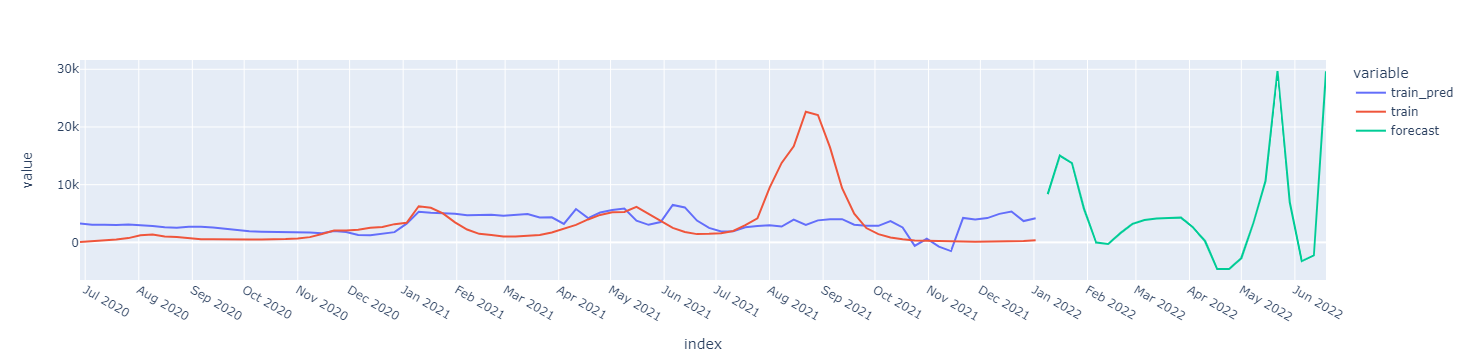

In [14]:
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
y_train_index = y_train.index

y_train_pred = model.predict(X_train)
y_train_pred = sc.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_train_pred = pd.Series(y_train_pred, index=y_train_index, name='train_pred')
y_train = sc.inverse_transform(y_train.values.reshape(-1, 1)).ravel()
y_train = pd.Series(y_train, index=y_train_index, name='train')

rmse = np.sqrt( mean_squared_error(y_train, y_train_pred) )
print('RMSE: {:.5}'.format(rmse))

X_forecast = X[X.index > train_last_date]
y_forecast = y[y.index > train_last_date]
y_forecast_index = y_forecast.index

y_forecast = model.predict(X_forecast)
y_forecast = sc.inverse_transform(y_forecast.reshape(-1, 1)).ravel()
y_forecast = pd.Series(y_forecast, index=y_forecast_index, name='forecast')

fig = px.line(pd.concat([y_train_pred, y_train, y_forecast], axis=1))
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()